# Imports

In [1]:
%reload_ext nb_black
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly
import seaborn as sns

%matplotlib inline
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import warnings

warnings.filterwarnings(action="ignore")

<IPython.core.display.Javascript object>

In [2]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "houseprices"
conn_str = f"postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}"
query = """
SELECT *
FROM houseprices
"""
df = pd.read_sql_query(query, con=conn_str)

<IPython.core.display.Javascript object>

# Linear Regression Model

In [22]:
df = df[["temperature", "humidity", "windspeed", "windbearing", "pressure"]]

# variables for model features, target
X = df.drop(columns=["temperature"])
y = df.temperature

X_train, X_test, y_train, y_test = train_test_split(
    X, y)

<IPython.core.display.Javascript object>

In [23]:
# create linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# model test scores
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(train_score)
print(test_score)

0.4242315907398956
0.40948558755363207


<IPython.core.display.Javascript object>

# Gauss-Markov assumptions

## Homoscedasticity

In [29]:
def plot_sced_test(df, target, features):
    for var in features:
        X = df[var]
        y = df[target]

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=28
        )

        # Add a constant for the intercept
        # This will work but throw a warning.. to silence the warning you can pass X.values instead
        X_train_const = sm.add_constant(X_train)
        X_test_const = sm.add_constant(X_train)

        lm_results = sm.OLS(y_train, X_train_const).fit()
        y_pred = lm_results.predict(X_test_const)

        #     plt.scatter(X_train, y_train, alpha=0.1)
        #     plt.plot(X_train, y_pred, c="red")
        #     plt.xlabel(var)
        #     plt.ylabel("Temperature")
        #     plt.show()

        #     lm_results.summary()

        true_residuals = lm_results.resid
        rand_norm_residuals = np.random.normal(0, 3, len(y_train))

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].scatter(X_train, rand_norm_residuals, alpha=0.2)
        axes[0].axhline(0, c="red", alpha=0.5)
        axes[0].set_xlabel(var)
        axes[0].set_ylabel("Residual")
        axes[0].set_title("What we want to see")

        axes[1].scatter(X_train, true_residuals, alpha=0.2)
        axes[1].axhline(0, c="red", alpha=0.5)
        axes[1].set_xlabel(var)
        axes[1].set_ylabel("Residual")
        axes[1].set_title("What we actually see")
        plt.show()

<IPython.core.display.Javascript object>

> Humidity probably doesn't meet the homoscedasticity assumption
---

## Multicollinearity

In [30]:
import warnings
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


def print_vif(x):
    """Utility for checking multicollinearity assumption
    
    :param x: input features to check using VIF. This is assumed to be a pandas.DataFrame
    :return: nothing is returned the VIFs are printed as a pandas series
    """
    # Silence numpy FutureWarning about .ptp
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        x = sm.add_constant(x)
    
    vifs = []
    for i in range(x.shape[1]):
        vif = variance_inflation_factor(x.values, i)
        vifs.append(vif)

    print('VIF results\n-------------------------------')
    print(pd.Series(vifs, index=x.columns))
    print('-------------------------------\n')


<IPython.core.display.Javascript object>

In [33]:
df

,temperature,humidity,windspeed,windbearing,pressure
0,9.472222,0.89,14.1197,251.0,1015.13
1,9.355556,0.86,14.2646,259.0,1015.63
2,9.377778,0.89,3.9284,204.0,1015.94
3,8.288889,0.83,14.1036,269.0,1016.41
4,8.755556,0.83,11.0446,259.0,1016.51
...,...,...,...,...,...
96448,26.016667,0.43,10.9963,31.0,1014.36
96449,24.583333,0.48,10.0947,20.0,1015.16
96450,22.038889,0.56,8.9838,30.0,1015.66
96451,21.522222,0.60,10.5294,20.0,1015.95


<IPython.core.display.Javascript object>

In [34]:
print_vif(df)

VIF results
-------------------------------
const          126.343413
temperature      1.725857
humidity         1.817287
windspeed        1.104611
windbearing      1.015138
pressure         1.002632
dtype: float64
-------------------------------



<IPython.core.display.Javascript object>

> The multicollinearity fits the assumptions
---

## Expected error values

In [45]:
df = df[["temperature", "humidity", "windspeed", "windbearing", "pressure"]]

# variables for model features, target
X = df.drop(columns=["temperature"])
y = df.temperature

X_train, X_test, y_train, y_test = train_test_split(X, y)

<IPython.core.display.Javascript object>

In [46]:
# create linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# model test scores
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(train_score)
print(test_score)

0.4225038504347296
0.4147135979063832


<IPython.core.display.Javascript object>

In [47]:
predictions = model.predict(X_train)
errors = y_train - predictions
np.mean(errors)

-1.2643150249547367e-15

<IPython.core.display.Javascript object>

> expected error value meets the assumptions
---

## Uncorrelated error terms

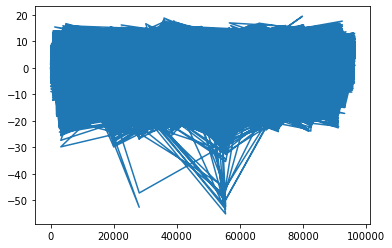

<IPython.core.display.Javascript object>

In [48]:
plt.plot(errors)
plt.show()

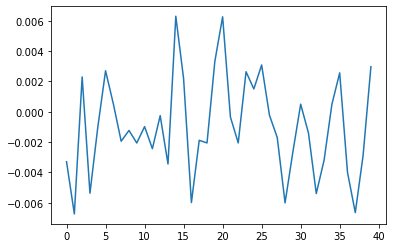

<IPython.core.display.Javascript object>

In [50]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

> error doesn't show any patterns and the autocorrelation function values are very low; meets assumptions
---

## Normality of errors

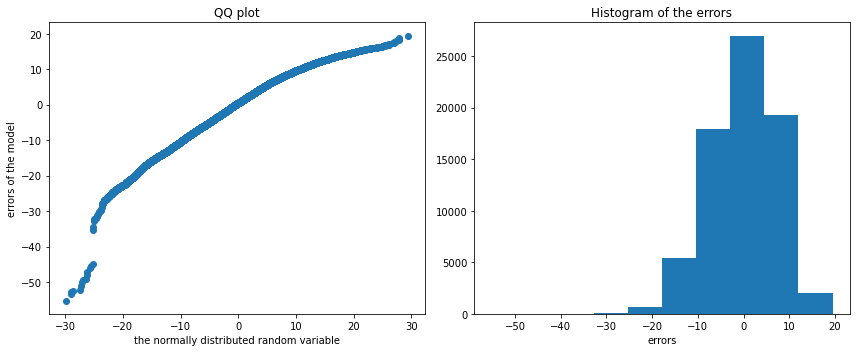

<IPython.core.display.Javascript object>

In [49]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # Sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()


> Errors fit normal distribution and fit the assumptions
---

# Interpreting Estimated Coefficients